# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

--2021-03-25 10:16:31--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240502 (235K) [image/png]
Saving to: ‘jet.png’

jet.png             100%[===================>] 234.87K  --.-KB/s    in 0.01s   

2021-03-25 10:16:31 (17.8 MB/s) - ‘jet.png’ saved [240502/240502]

--2021-03-25 10:16:31--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2221 (2.2K) [image/png]
Saving to: ‘kw.

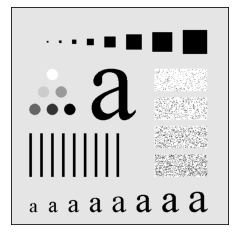

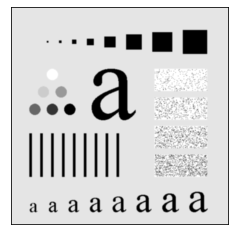

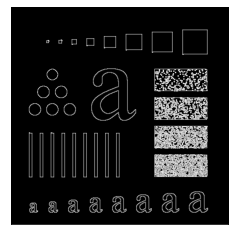

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal

def print_img(image):
  plt.imshow(image, cmap ="gray")
  plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
  plt.show()

def cv2_filter2D(img, k):
  kernel = np.ones((k,k),np.float32)/(k*k)
  return cv2.filter2D(img,-1,kernel)

# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate

plansza = cv2.imread('plansza.png')           # Read image
plansza = cv2.cvtColor(plansza, cv2.COLOR_BGR2GRAY) # Convert to RGB

print_img(plansza)

filtered_plansza = cv2_filter2D(plansza,3)

print_img(filtered_plansza)

print_img(abs(filtered_plansza - plansza))

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

(-0.5, 499.5, 499.5, -0.5)

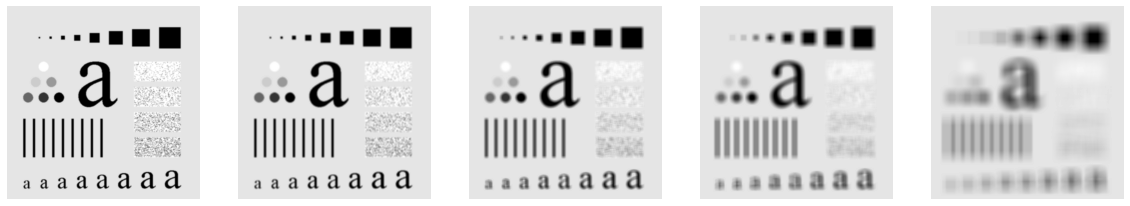

In [2]:
fig, axs = plt.subplots(1, 5)

fig.set_size_inches(20, 10)

axs[0].imshow(cv2_filter2D(plansza, 3), 'gray', vmin=0, vmax=256)
axs[0].axis('off')

axs[1].imshow(cv2_filter2D(plansza, 5), 'gray', vmin=0, vmax=256)
axs[1].axis('off')

axs[2].imshow(cv2_filter2D(plansza, 9), 'gray', vmin=0, vmax=256)
axs[2].axis('off')

axs[3].imshow(cv2_filter2D(plansza, 15), 'gray', vmin=0, vmax=256)
axs[3].axis('off')

axs[4].imshow(cv2_filter2D(plansza, 35), 'gray', vmin=0, vmax=256)
axs[4].axis('off')

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

--2021-03-25 10:16:55--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/lenaRGB.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 786486 (768K) [image/bmp]
Saving to: ‘lenaRGB.bmp’

lenaRGB.bmp         100%[===================>] 768.05K  --.-KB/s    in 0.05s   

2021-03-25 10:16:55 (16.0 MB/s) - ‘lenaRGB.bmp’ saved [786486/786486]



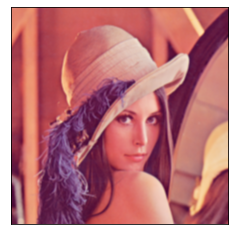

In [3]:
if not os.path.exists("lenaRGB.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/lenaRGB.bmp --no-check-certificate

lena = cv2.imread('lenaRGB.bmp', cv2.COLOR_BGR2RGB)
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

print_img(cv2_filter2D(lena, 5))

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

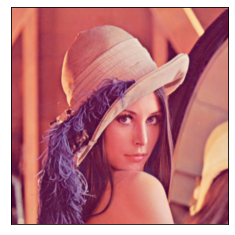

In [4]:
def cv2_mask_filter2D(img, kernel):
  return cv2.filter2D(img,-1,kernel)

M = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])
M = M/sum(sum(M))
print_img(cv2_mask_filter2D(lena, M))

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


Sigma = 0.1:
[[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]


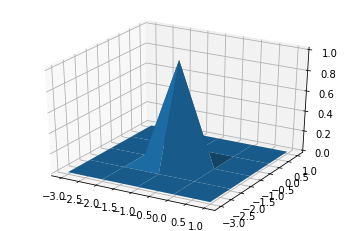

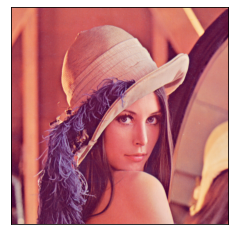

Sigma = 0.5:
[[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]


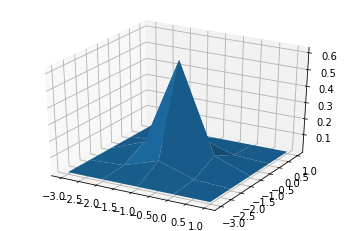

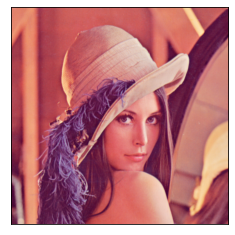

Sigma = 1:
[[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]


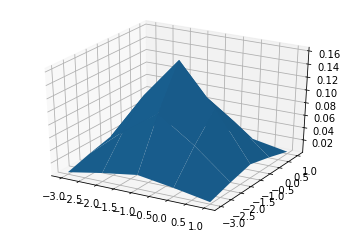

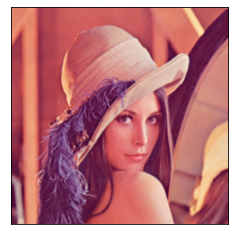

Sigma = 2:
[[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]


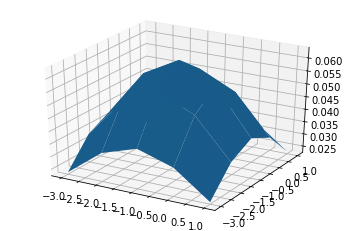

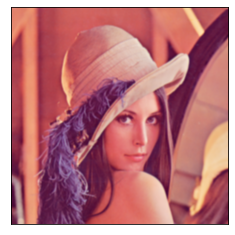

In [5]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     print(x)
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()

sigma = 0.1
print("Sigma = " + str(sigma) + ":") 
mask = fgaussian(5, sigma)
mesh(mask, 5)
print_img(cv2_mask_filter2D(lena, mask))

sigma = 0.5
print("Sigma = " + str(sigma) + ":") 
mask = fgaussian(5, sigma)
mesh(mask, 5)
print_img(cv2_mask_filter2D(lena, mask))

sigma = 1
print("Sigma = " + str(sigma) + ":") 
mask = fgaussian(5, sigma)
mesh(mask, 5)
print_img(cv2_mask_filter2D(lena, mask))

sigma = 2
print("Sigma = " + str(sigma) + ":") 
mask = fgaussian(5, sigma)
mesh(mask, 5)
print_img(cv2_mask_filter2D(lena, mask))


### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


Original:


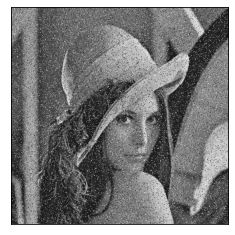

2D filtered:


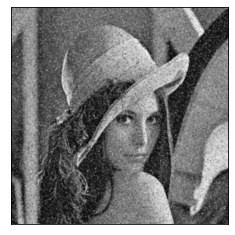

Difference:


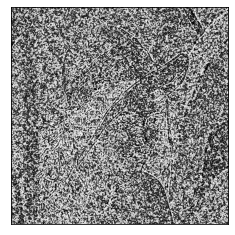

----------------------------------------------
Original:


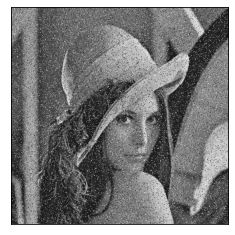

Median Blur:


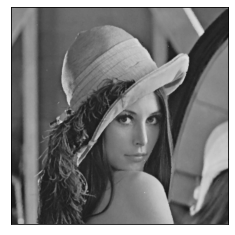

Difference:


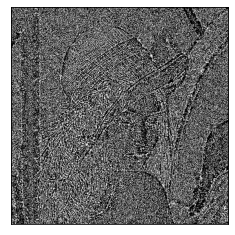

In [6]:
lenaS = cv2.imread('lenaSzum.png')
lenaS = cv2.cvtColor(lenaS, cv2.COLOR_BGR2GRAY)

print("Original:")
print_img(lenaS)

print("2D filtered:")
filtered_2d_lenaS = cv2_filter2D(lenaS, 3)
print_img(filtered_2d_lenaS)

print("Difference:")
print_img(abs(lenaS - filtered_2d_lenaS))

print("----------------------------------------------")
print("Original:")
print_img(lenaS)

print("Median Blur:")
print_img(cv2.medianBlur(lenaS,3))

print("Difference:")
print_img(abs(lenaS - cv2.medianBlur(lenaS,3)))

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

Original:


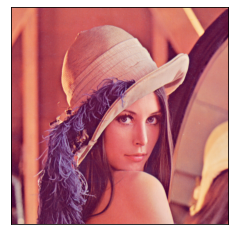

2D filtered:


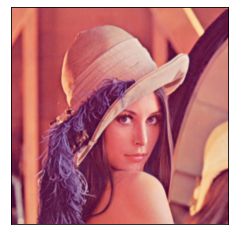

Difference:


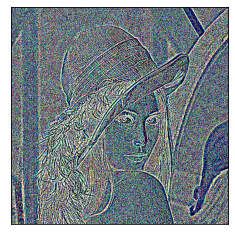

----------------------------------------------
Original:


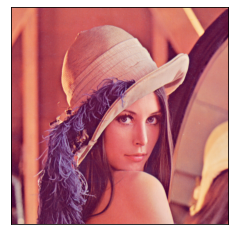

Median Blur:


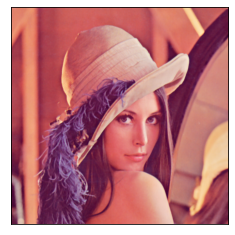

Difference:


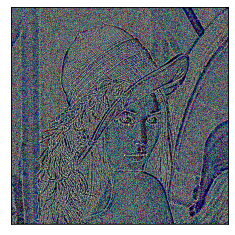

----------------------------------------------
Median Blur 10x:


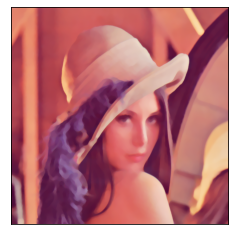

In [7]:
print("Original:")
print_img(lena)

print("2D filtered:")
filtered_2d_lena = cv2_filter2D(lena, 3)
print_img(filtered_2d_lena)

print("Difference:")
print_img(abs(lena - filtered_2d_lena))

print("----------------------------------------------")
print("Original:")
print_img(lena)

print("Median Blur:")
print_img(cv2.medianBlur(lena,3))

print("Difference:")
print_img(abs(lena - cv2.medianBlur(lena,3)))

print("----------------------------------------------")
print("Median Blur 10x:")
median_blurred_lena = lena
for i in range(10):
  median_blurred_lena = cv2.medianBlur(median_blurred_lena, 5)

print_img(median_blurred_lena)

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

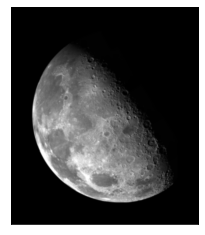

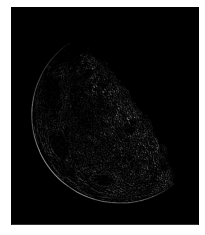

In [8]:
moon = cv2.imread('moon.png')
moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)

print_img(moon)

laplacian_mask = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])/9

filter = cv2_mask_filter2D(moon, laplacian_mask)

for i in range(len(filter)):
  for j in range(len(filter[i])):
    filter[i, j] = filter[i, j] + 128

print_img(filter)

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



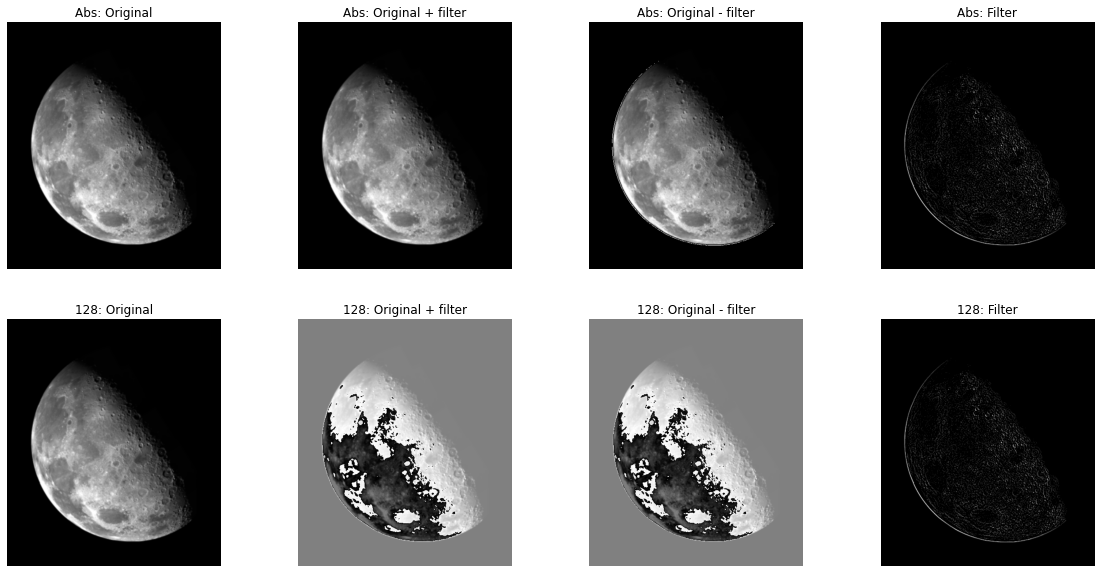

In [9]:
def laplacian_filter(img, mask):
  filter = cv2_mask_filter2D(img, mask)

  filter128 = np.copy(filter)

  for i in range(len(filter)):
    for j in range(len(filter[i])):
      filter[i, j] = abs(filter[i, j])
      filter128[i, j] = filter128[i, j] + 128

  fig, axs = plt.subplots(2, 4)

  fig.set_size_inches(20, 10)

  axs[0,0].imshow(img, 'gray')
  axs[0,0].axis('off')
  axs[0,0].set_title('Abs: Original')

  axs[0,1].imshow(img + filter, 'gray')
  axs[0,1].axis('off')
  axs[0,1].set_title('Abs: Original + filter')

  axs[0,2].imshow(abs(img - filter), 'gray')
  axs[0,2].axis('off')
  axs[0,2].set_title('Abs: Original - filter')

  axs[0,3].imshow(filter, 'gray')
  axs[0,3].axis('off')
  axs[0,3].set_title('Abs: Filter')

  axs[1,0].imshow(img, 'gray')
  axs[1,0].axis('off')
  axs[1,0].set_title('128: Original')

  axs[1,1].imshow(img + filter128, 'gray')
  axs[1,1].axis('off')
  axs[1,1].set_title('128: Original + filter')

  axs[1,2].imshow(abs(img - filter128), 'gray')
  axs[1,2].axis('off')
  axs[1,2].set_title('128: Original - filter')

  axs[1,3].imshow(filter128, 'gray')
  axs[1,3].axis('off')
  axs[1,3].set_title('128: Filter')

laplacian_filter(moon, laplacian_mask)

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

Gradient Robertsa:


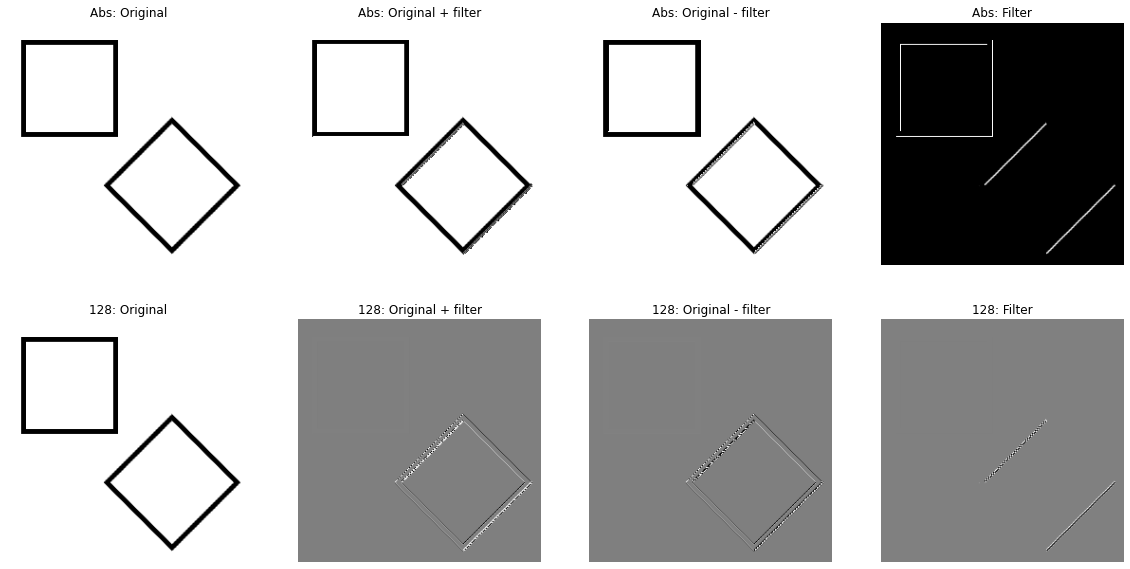

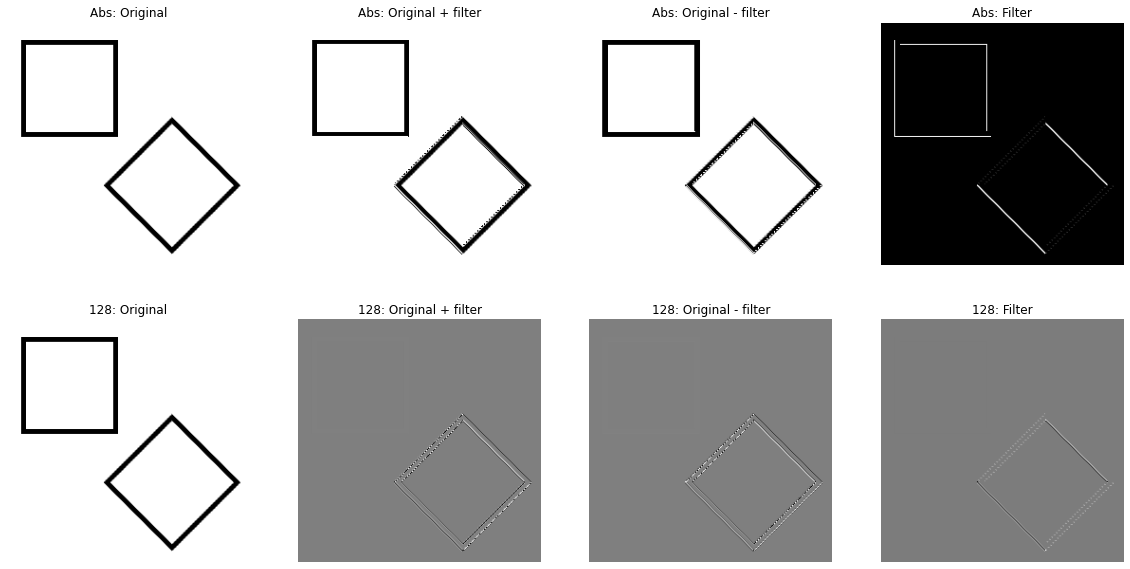

In [10]:
kw = cv2.imread('kw.png')
kw = cv2.cvtColor(kw, cv2.COLOR_BGR2GRAY)

R1 = np.array([[0, 0, 0],[-1, 0, 0],[0, 1, 0]])
R2 = np.array([[0, 0, 0],[0, 0, -1],[0, 1, 0]])

print("Gradient Robertsa:")

laplacian_filter(kw, R1)
laplacian_filter(kw, R2)

Gradient Prewitta:


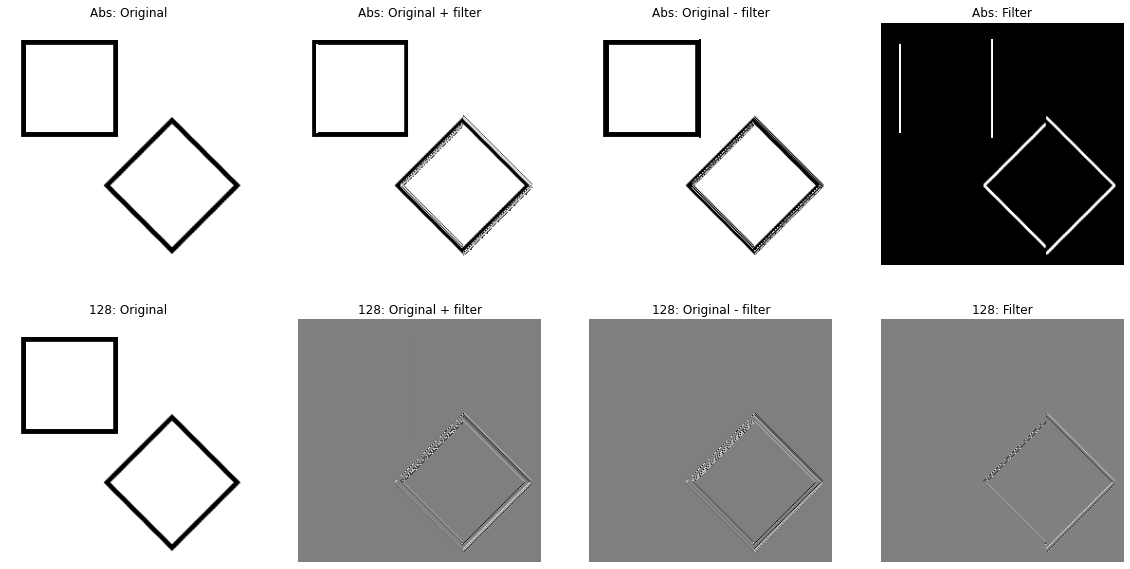

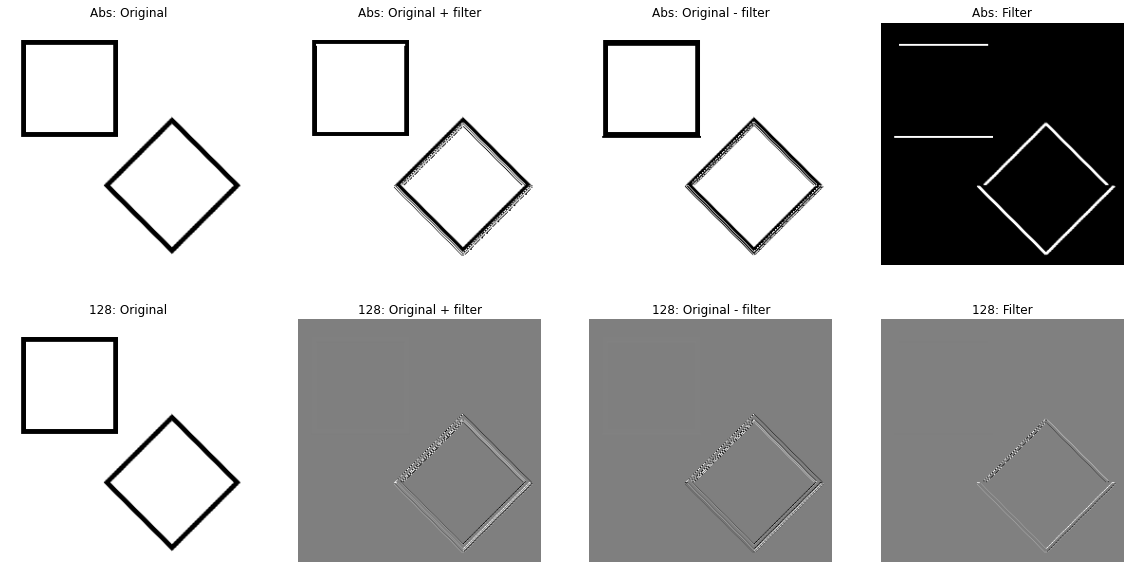

In [11]:
P1 = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
P2 = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

print("Gradient Prewitta:")

laplacian_filter(kw, P1)
laplacian_filter(kw, P2)

Gradient Sobela:


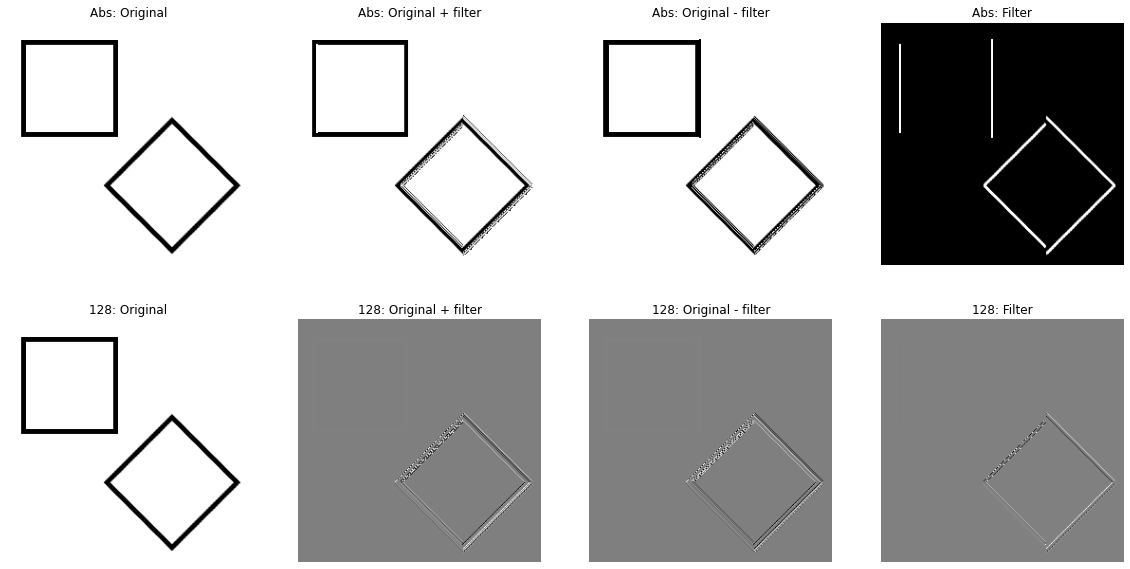

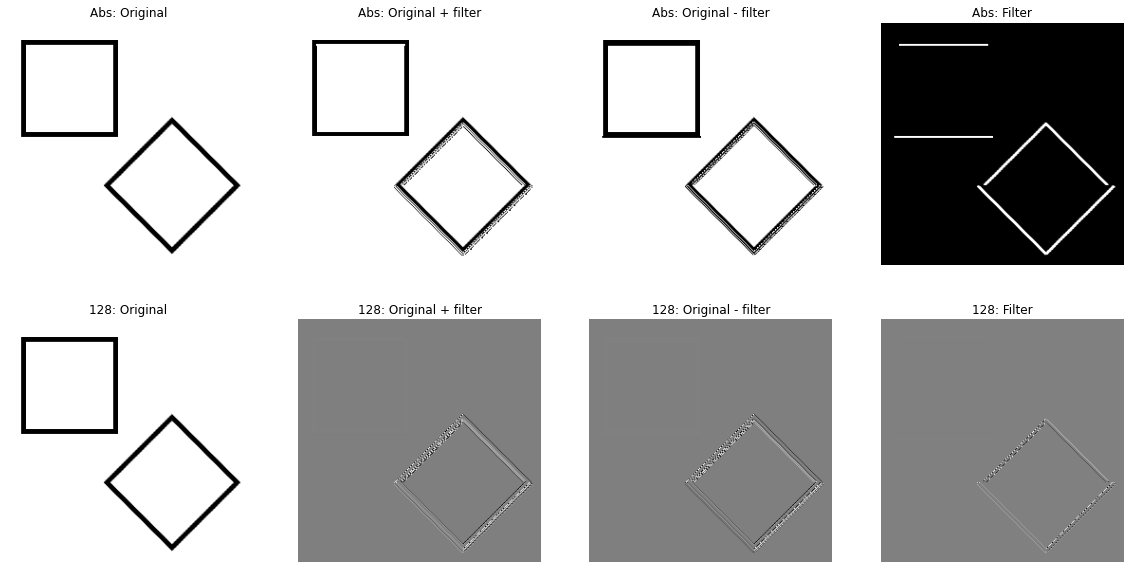

In [12]:
S1 = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
S2 = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

print("Gradient Sobela:")

laplacian_filter(kw, S1)
laplacian_filter(kw, S2)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



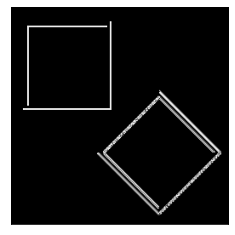

In [13]:
kw = kw.astype('uint16')

result = np.sqrt(np.square(cv2_mask_filter2D(kw, S1)) + np.square(cv2_mask_filter2D(kw, S2)))

print_img(result)

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

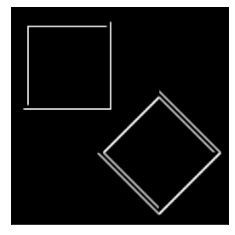

In [14]:
kw = kw.astype('uint16')

result = np.sqrt(np.absolute(cv2_mask_filter2D(kw, S1)) + np.absolute(cv2_mask_filter2D(kw, S2)))

print_img(result)

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

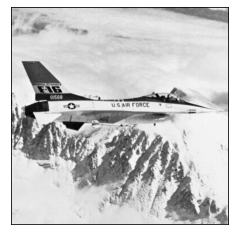

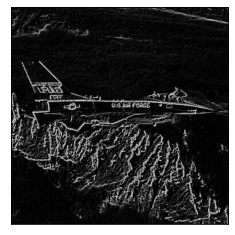

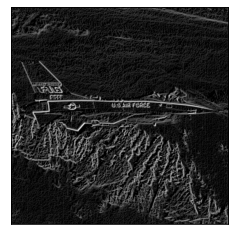

In [15]:
jet = cv2.imread('jet.png')
jet = cv2.cvtColor(jet, cv2.COLOR_BGR2GRAY)

jet = jet.astype('uint16')

jet_square = np.sqrt(np.square(cv2_mask_filter2D(jet, S1)) + np.square(cv2_mask_filter2D(jet, S2)))
jet_abs = np.sqrt(np.absolute(cv2_mask_filter2D(jet, S1)) + np.absolute(cv2_mask_filter2D(jet, S2)))

print_img(jet)
print_img(jet_square)
print_img(jet_abs)